### Import necessary libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
pd.set_option('display.max_columns', 500)
import seaborn as sns

#### The data was loaded in different csv's from RDS. Loading individual csv's and concatenate them further

In [155]:
df_july_1 = pd.read_csv('event_data.csv', sep=';', error_bad_lines= False)
df_july_2 = pd.read_csv('event_data_26.csv', sep=',', error_bad_lines= False)
df_aug_1 = pd.read_csv('august_event_data.csv', sep=',', error_bad_lines= False)
df_aug_2 = pd.read_csv('august_event_data_2.csv', sep=',', error_bad_lines= False)
df_sept_1 = pd.read_csv('sept_event_data.csv', sep=';', error_bad_lines= False)
# df_sept_2 = pd.read_csv('sept2_oct1_event_data.csv', sep=',', error_bad_lines= False)

## Concatenate all the csv's
df = pd.concat([df_july_1,df_july_2,df_aug_1,df_aug_2,df_sept_1], ignore_index=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Data Preprocessing

- Following pre-processing methods were adopted
    1. All the values belonging to data integrity value as 192 are considered
    2. To make results more promising and less biased all the heats consisting of 4 buckets were discarded and only those heats were taken whose total bucket count was 3.
    3. Cold starts (first heat of a session) were discarded since they may have biased behavior (or may fall under bad performing heats -- usually first heat consumes more KWH consumption)

### 1.  Data Integrity
All the values belonging to data integrity value as 192 are considered. refer following [link on data integrity](https://docs.inductiveautomation.com/display/DOC79/Tag+Quality+and+Overlays)


In [156]:
df = df[df['dataintegrity'] == 192]

In [157]:
## checking number of unique heats across the dataset
df['heat_no'].nunique()

1435

### 2. Bucket size = 3
To make results more promising and less biased all the heats consisting of 4 buckets were discarded and only those heats were taken whose total bucket count was 3.


In [158]:
## filtering out heats with bucket size greater than 3

filtered_heats = df.groupby('heat_no')['bucket_no'].max().reset_index()
filtered_heats = filtered_heats[filtered_heats['bucket_no']<=3.0]
df = pd.merge(df,filtered_heats['heat_no'],how='inner',on='heat_no')

In [159]:
df['heat_no'].nunique()

1056

After removing all the heats whose bucket size was greater than 3. we are left out with 1056 heats

### Importing Moms data.
#### MOMS dataset contains aggregate level information about the dataset.

In [160]:
moms_df = pd.read_excel('MOMSData_20190401To20191120.xlsx', sheet_name='AF6_Operation_Record')

In [162]:
## Pivoting the dataset against tag name.

df_pivot = pd.pivot_table(df, values = 'floatvalue', index=['heat_no'], \
                          columns = 'tag_name', aggfunc='max').reset_index()
df_pivot.head()

tag_name,heat_no,Active power consumption primary side,Active power consumption secondary side,Active power secondary side,Actual DC current,Actual DC voltage,Actual VLB operating mode - VLB 1,Actual VLB operating mode - VLB 2,Actual VLB operating mode - VLB 3,Actual VLB operating mode - VLB 4,Actual VLB operating mode - VLB 5,Actual VLB operating mode - VLB 6,Actual carbjet operating mode - Carbjet 1,Actual carbjet operating mode - Carbjet 2,Actual electrode regulation step,"Binary, Shaft gate open signal ""1 - open, 0 - close","Binary, Shaft lifting signal ""1 - tapping, 0 - working",Carbjet 1 fine coke injection actual flow,Carbjet 1 fine coke injection flow setpoint,Carbjet 2 fine coke injection actual flow,Carbjet 2 fine coke injection flow setpoint,Current bucket number,DC current setpoint per electrode regulation step,DC voltage setpoint per electrode regulation step,Finger position reading - slag side,Furnace tilt angle,Main line pressure - VLB 1,Main line pressure - VLB 2,Main line pressure - VLB 3,Main line pressure - VLB 4,Main line pressure - VLB 5,Main line pressure - VLB 6,Power factor secondary side,Reactive power consumption primary side,Reactive power consumption secondary side,Reactive power secondary side,Total CaO consumption charged from ACS conveyor,Total MgO/Dolime consumption charged from ACS conveyor,Total VLB 1 main oxygen consumption,Total VLB 1 oil consumption,Total VLB 1 secondary oxygen consumption,Total VLB 2 main oxygen consumption,Total VLB 2 oil consumption,Total VLB 2 secondary oxygen consumption,Total VLB 3 main oxygen consumption,Total VLB 3 oil consumption,Total VLB 3 secondary oxygen consumption,Total VLB 4 main oxygen consumption,Total VLB 4 oil consumption,Total VLB 4 secondary oxygen consumption,Total VLB 5 main oxygen consumption,Total VLB 5 oil consumption,Total VLB 5 secondary oxygen consumption,Total VLB 6 main oxygen consumption,Total VLB 6 oil consumption,Total VLB 6 secondary oxygen consumption,Total VLB system main oxygen consumption,Total VLB system oil consumption,Total VLB system secondary oxygen consumption,Total carbjet fine coke consumption,Total coke consumption charged from ACS conveyor,Total elapsed time since last tapping,Total lance manipulator oxygen consumption,Total time AF power OFF in current heat,Total time AF power ON in current heat,VLB 1 main oxygen actual flow,VLB 1 main oxygen flow setpoint,VLB 1 oil actual flow,VLB 1 oil flow setpoint,VLB 1 secondary oxygen actual flow,VLB 1 secondary oxygen flow setpoint,VLB 2 main oxygen actual flow,VLB 2 oil actual flow,VLB 2 oil flow setpoint,VLB 2 secondary oxygen actual flow,VLB 2 secondary oxygen flow setpoint,VLB 3 main oxygen actual flow,VLB 3 main oxygen flow setpoint,VLB 3 oil actual flow,VLB 3 oil flow setpoint,VLB 3 secondary oxygen actual flow,VLB 3 secondary oxygen flow setpoint,VLB 4 main oxygen actual flow,VLB 4 main oxygen flow setpoint,VLB 4 oil actual flow,VLB 4 oil flow setpoint,VLB 4 secondary oxygen actual flow,VLB 4 secondary oxygen flow setpoint,VLB 5 main oxygen actual flow,VLB 5 main oxygen flow setpoint,VLB 5 oil actual flow,VLB 5 oil flow setpoint,VLB 5 secondary oxygen actual flow,VLB 5 secondary oxygen flow setpoint,VLB 6 main oxygen actual flow,VLB 6 main oxygen flow setpoint,VLB 6 oil actual flow,VLB 6 oil flow setpoint,VLB 6 secondary oxygen actual flow,VLB 6 secondary oxygen flow setpoint,VLB system oil inlet pressure,VLB system oxygen inlet pressure
0,L19NH03619,23.769602,23.288050,46.661377,83.868408,712.792969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,0.0,0.0,65.999985,0.0,NaN,NaN,3.0,80.0,495.0,707.682312,9.768520,8.651620,9.178241,6.892361,2.222222,2.581018,2.337963,1.000916,21.472425,21.367327,53.930664,1857.855835,681.966125,630.089172,90.353615,123.114616,492.055298,77.323647,104.291580,641.265869,88.723404,118.513641,292.655579,88.875862,136.652512,278.224518,104.794121,143.205658,104.794121,87.166412,137.133759,2659.949463,541.233093,764.628662,848.0,878.146729,NaN,NaN,5.783333,39.01

In [163]:
## Filtering out relevant tags

df_pivot = df_pivot[['heat_no', 'Finger position reading - slag side',
   'Furnace tilt angle','Binary, Shaft lifting signal "1 - tapping, 0 - working',
       'Carbjet 1 fine coke injection actual flow',
       'Carbjet 2 fine coke injection actual flow',
       'Actual VLB operating mode - VLB 1',
       'Actual VLB operating mode - VLB 2',
       'Actual VLB operating mode - VLB 3',
       'VLB 1 main oxygen flow setpoint',
       'VLB 3 main oxygen flow setpoint',
       'Total VLB system oil consumption',
       'Total time AF power ON in current heat',
       'Total VLB system main oxygen consumption',
       'Total coke consumption charged from ACS conveyor']]
df_pivot.head()




tag_name,heat_no,Finger position reading - slag side,Furnace tilt angle,"Binary, Shaft lifting signal ""1 - tapping, 0 - working",Carbjet 1 fine coke injection actual flow,Carbjet 2 fine coke injection actual flow,Actual VLB operating mode - VLB 1,Actual VLB operating mode - VLB 2,Actual VLB operating mode - VLB 3,VLB 1 main oxygen flow setpoint,VLB 3 main oxygen flow setpoint,Total VLB system oil consumption,Total time AF power ON in current heat,Total VLB system main oxygen consumption,Total coke consumption charged from ACS conveyor
0,L19NH03619,707.682312,9.768520,0.0,65.999985,NaN,0.0,0.0,0.0,1750.0,1750.0,541.233093,39.016666,2659.949463,878.146729
1,L19NH03638,707.682312,9.282410,0.0,71.999916,40.121872,0.0,0.0,0.0,1750.0,1750.0,630.534302,38.950001,3102.786133,827.799561
2,L19NH03641,707.465271,9.375000,0.0,65.999992,42.190514,0.0,0.0,0.0,1750.0,1750.0,547.608643,35.383335,2377.892822,832.899292
3,L19NH03642,707.465271,9.907410,0.0,65.999977,35.910370,0.0,0.0,0.0,1750.0,1750.0,553.977661,35.650002,2578.235107,814.019104
4,L19NH03649,707.682312,9.236111,0.0,71.999992,NaN,0.0,0.0,0.0,1750.0,1750.0,498.962158,35.416668,2427.396729,1098.090332


In [164]:
## Merging Moms and pivoted dataset
df_merged = pd.merge(df_pivot,moms_df[['Heat_No','Billet_Wt', 'AF_Total_KWH','RBT_Life']],\
                      left_on='heat_no', right_on='Heat_No',how='inner')


### 3. Cold Starts

Cold starts (first heat of a session) were discarded since they may have biased behavior (or may fall under bad performing heats -- usually first heat consumes more KWH consumption)

The column RBT Life depicts the session. RBT Life as 1 corresponds to start of each session

In [165]:
## Drop Cold Start Heat from dataframe 
i = df_merged[df_merged['RBT_Life']==1].index
print(i)
df_merged.drop(i, inplace=True)

Int64Index([453, 862, 1012], dtype='int64')


In [166]:
df_merged['heat_no'].nunique()

1053

Finally after pre-processing we are left with ***1053 heats***

## Analysis 1:  Identify Good and Bad Performing Heats

##### Key points to keep in mind
- The idea is to identify good and poor performing heats. 
- Based on our understanding with Natsteel Latent heat of preceding heats seems to have a high influence on overall electricity consumption on the next set of heats.
- Kilowatt hour (electricity) was considered to be one the crucial factor in determining overall production cost.
- Make a note a low KWH value per tonne of steel doesn't essentially means it is a good performing steel. It is the series or set of heats following a specific pattern that determines heat’s characteristic to be good or bad.


#### Calculating the consumption of electricity per tonne of steel

In [167]:
df_merged['AF_Total_KWH_Ratio']=(df_merged['AF_Total_KWH']/df_merged['Billet_Wt'])
df_merged['AF_Total_KWH_AbsPerc']=df_merged['AF_Total_KWH_Ratio']*1000 ## AbsPerc (Absolute Percentage) gives electricity consumption per tonne of steel

### [Simple Moving Average](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average)

- Simple moving average is the unweighted mean of the previous n data. In our case 'n' is 60 previous heats.
- Based on our business understanding Latent heat of preceding heats seems to have a high influence on overall electricity consumption on the next set of heats.
- In order to compensate for such influential behavior of preceding heats a simple moving average of 60 heats was taken into consideration.

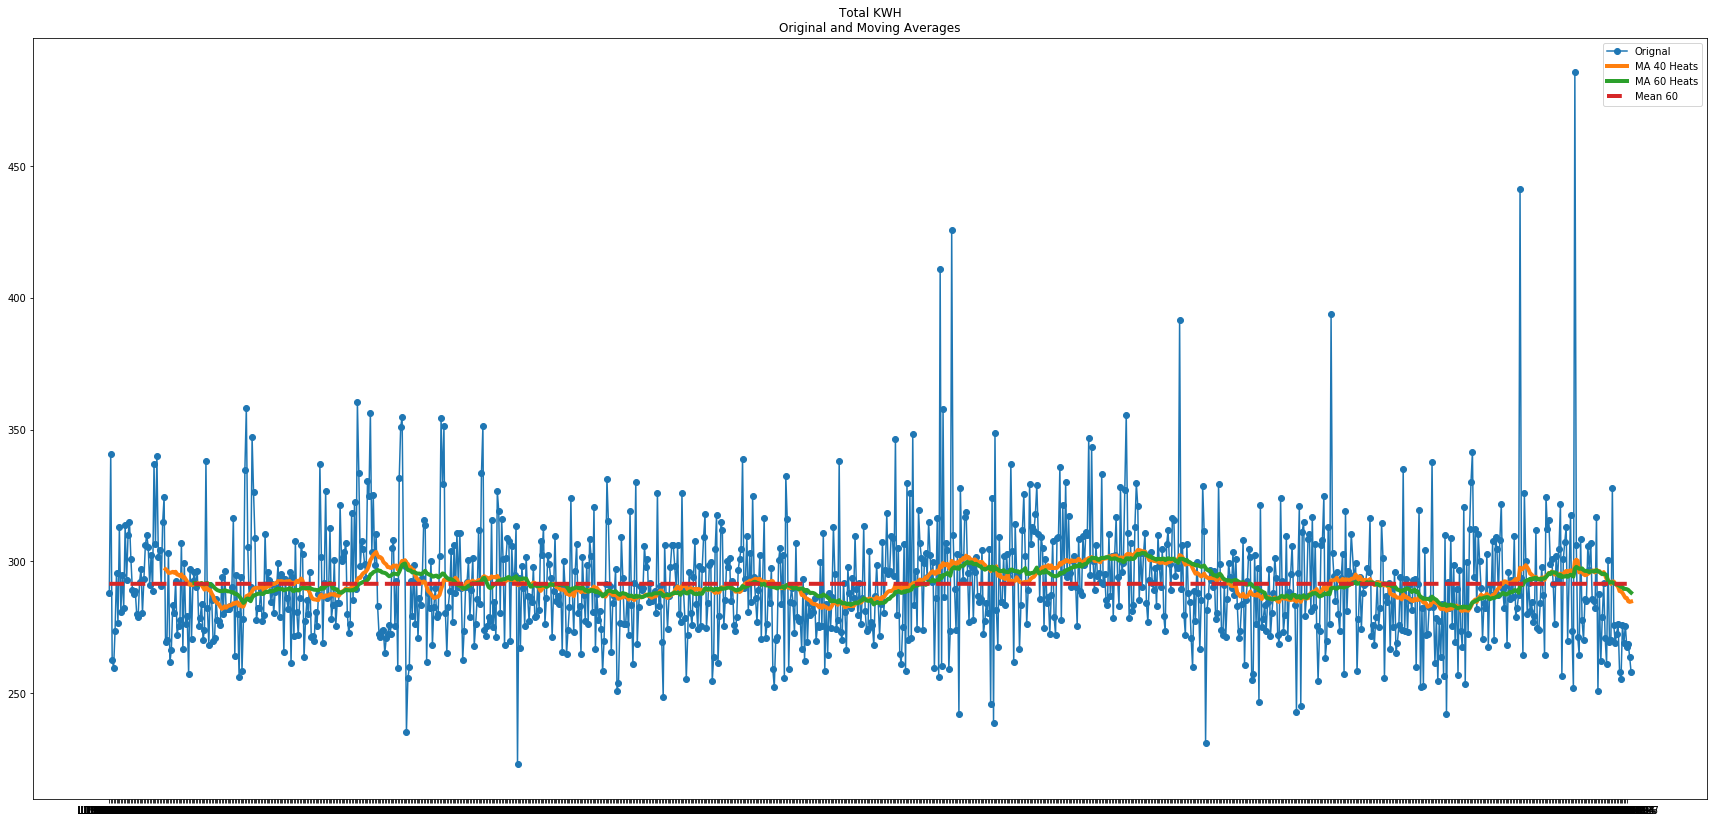

In [195]:
rcParams['figure.figsize'] = 30, 14

x = df_merged['heat_no']
y = df_merged['AF_Total_KWH_AbsPerc']
y_10 = df_merged['AF_Total_KWH_AbsPerc'].rolling(10).mean()
y_21 = df_merged['AF_Total_KWH_AbsPerc'].rolling(21).mean()
y_40 = df_merged['AF_Total_KWH_AbsPerc'].rolling(40).mean()
y_60 = df_merged['AF_Total_KWH_AbsPerc'].rolling(60).mean()

y_mean_org = [np.mean(y)]*len(x)
y_mean_10 = [np.mean(y_10)]*len(x)
y_mean_21 = [np.mean(y_21)]*len(x)
y_mean_40 = [np.mean(y_40)]*len(x)
y_mean_60 = [np.mean(y_60)]*len(x)

plt.plot(df_merged['AF_Total_KWH_AbsPerc'],label= 'Orignal', marker='o', linewidth=1.5)
# plt.plot(df_merged['AF_Total_KWH_AbsPerc'].rolling(10).mean(),label= 'MA 10 Heats')
# plt.plot(df_merged['AF_Total_KWH_AbsPerc'].rolling(21).mean(),label= 'MA 21 Heats')
plt.plot(df_merged['AF_Total_KWH_AbsPerc'].rolling(40).mean(),label= 'MA 40 Heats', linewidth=4)
plt.plot(df_merged['AF_Total_KWH_AbsPerc'].rolling(60).mean(),label= 'MA 60 Heats', linewidth=4)



# plt.plot(df_merged['heat_no'],y_mean_org, label='Mean Org', linestyle='--')
# plt.plot(df_merged['heat_no'],y_mean_10, label='Mean 10', linestyle='--')
# plt.plot(df_merged['heat_no'],y_mean_21, label='Mean 21', linestyle='--')
# plt.plot(df_merged['heat_no'],y_mean_40, label='Mean 40', linestyle='--',linewidth=4)
plt.plot(df_merged['heat_no'],y_mean_60, label='Mean 60', linestyle='--',linewidth=4)

plt.legend(loc='best')
plt.title('Total KWH\nOriginal and Moving Averages')
plt.show()

In [169]:
### Storing Mean and 60 Moving Average value in a variable
df_merged['AF_Total_KWH_AbsPerc_60MA'] = df_merged['AF_Total_KWH_AbsPerc'].rolling(60).mean()
df_merged['Mean_60MA'] = df_merged['AF_Total_KWH_AbsPerc_60MA'].mean()

##### Taking Mean difference between SMA and SMA-Mean value

- Taking absolute difference between 60 Moving average and Mean value.
- The difference would depict how far 60 SMA value is from the mean.
- The heats that were above the mean value and whose spread was consistent in nature, could be treated as Bad Heats (poor performing heats) whereas heats which were below the mean value were coined as Good heats (well performing heats)

In [170]:
df_merged['Mean_Diff_60MA'] = df_merged['AF_Total_KWH_AbsPerc_60MA']-df_merged['Mean_60MA']

- In order to establish a low standard deviation within a series of heats we have taken the 1st and 4th quartile of the heats distribution(bell curve). In order to make the analysis more robust we further discarded all the heats which might act as outlier. Hence we discarded 5% of extreme values falling under 1st and 4th quartile (i.e. first 5 percentile and 95 percentile onwards) 
- Additionally, all the heats ranging between 35 and 65 percentile were also discarded. --Attached reference image. 


![Distribution Curve](img/Bell_Curve.gif)

In [171]:
print("0.05: ", df_merged['Mean_Diff_60MA'].quantile(q=0.05))
print("0.35: ", df_merged['Mean_Diff_60MA'].quantile(q=0.35))
print("0.65: ", df_merged['Mean_Diff_60MA'].quantile(q=0.65))
print("0.95: ", df_merged['Mean_Diff_60MA'].quantile(q=0.95))

0.05:  -6.851233215718352
0.35:  -2.3138857660542866
0.65:  1.0650519481907545
0.95:  9.289024413399257


In [172]:
def heat_cat(mean):
    
    """Defining a function to consider
    all the values falling between 5 and 35 percentile
    as well as 65 to 95 percentile"""
    
    if (df_merged['Mean_Diff_60MA'].quantile(q=0.05)<=mean<=df_merged['Mean_Diff_60MA'].quantile(q=0.35)):
        return "Good Heat"
    elif(df_merged['Mean_Diff_60MA'].quantile(q=0.65)<=mean<=df_merged['Mean_Diff_60MA'].quantile(q=0.95)):
        return "Bad Heat"
    else:
        return "Unsure Heat"

In [173]:
df_merged['Category'] = df_merged['Mean_Diff_60MA'].apply(heat_cat)

In [174]:
print("Bad Heats: ", len(df_merged[df_merged['Category']=='Bad Heat']))
print("Good Heat: ", len(df_merged[df_merged['Category']=='Good Heat']))
print("Unsure Heat: ", len(df_merged[df_merged['Category']=='Unsure Heat']))
print("Total Heats: ", len(df_merged))

Bad Heats:  298
Good Heat:  298
Unsure Heat:  457
Total Heats:  1053


In [175]:
## Merging categorised heats data
df_grpd = df.groupby(by=['heat_no','bucket_no'])['bucket_duration_mins','heat_duration_mins'].max().reset_index()
samp_popln_aug = pd.merge(df_merged,df_grpd,on='heat_no', how='inner')

### Join Plots between various attributes

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


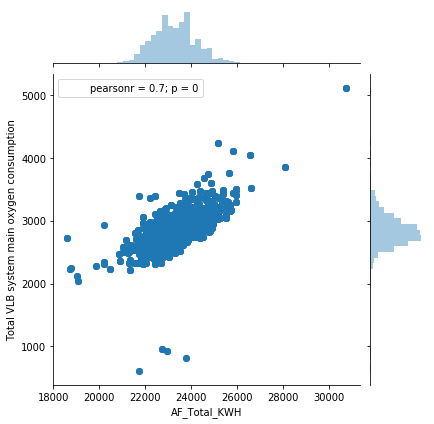

In [176]:
import scipy.stats as stats

j = sns.jointplot(x="AF_Total_KWH", y="Total VLB system main oxygen consumption", data=samp_popln_aug)
j.annotate(stats.pearsonr)
plt.show()


A low value of p (<0.05) indicates a strong evidence towards null hypothesis. Interestingly in our case there exists a strong correlation between Electricity consumption and main oxygen consumption since the ***p value is 0 and pearson r value is 0.7. ***

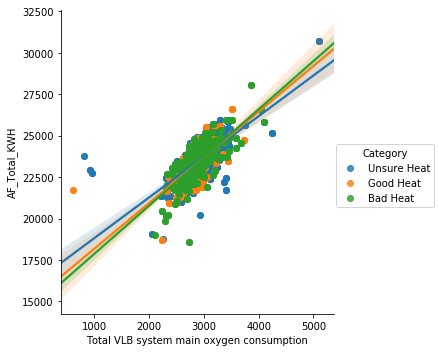

In [177]:
sns.lmplot(y="AF_Total_KWH", x="Total VLB system main oxygen consumption", fit_reg=True, \
           data=samp_popln_aug, hue='Category')

In [178]:
## Taking cumulative sum of bucket run time

samp_popln_aug['bucket_load_at'] = samp_popln_aug.groupby('heat_no')['bucket_duration_mins'].apply(
        lambda x: x.shift(1).cumsum(axis=0)).astype(float)

In [179]:
samp_popln_aug.head()

,heat_no,Finger position reading - slag side,Furnace tilt angle,"Binary, Shaft lifting signal ""1 - tapping, 0 - working",Carbjet 1 fine coke injection actual flow,Carbjet 2 fine coke injection actual flow,Actual VLB operating mode - VLB 1,Actual VLB operating mode - VLB 2,Actual VLB operating mode - VLB 3,VLB 1 main oxygen flow setpoint,VLB 3 main oxygen flow setpoint,Total VLB system oil consumption,Total time AF power ON in current heat,Total VLB system main oxygen consumption,Total coke consumption charged from ACS conveyor,Heat_No,Billet_Wt,AF_Total_KWH,RBT_Life,AF_Total_KWH_Ratio,AF_Total_KWH_AbsPerc,AF_Total_KWH_AbsPerc_60MA,Mean_60MA,Mean_Diff_60MA,Category,bucket_no,bucket_duration_mins,heat_duration_mins,bucket_load_at
0,L19NH03619,707.682312,9.76852,0.0,65.999985,NaN,0.0,0.0,0.0,1750.0,1750.0,541.233093,39.016666,2659.949463,878.146729,L19NH03619,82500.0,23770,14,0.288121,288.121212,NaN,291.51482,NaN,Unsure Heat,0.0,2.6754,47.6523,NaN
1,L19NH03619,707.682312,9.76852,0.0,65.999985,NaN,0.0,0.0,0.0,1750.0,1750.0,541.233093,39.016666,2659.949463,878.146729,L19NH03619,82500.0,23770,14,0.288121,288.121212,NaN,291.51482,NaN,Unsure Heat,1.0,1.9111,47.6523,2.6754
2,L19NH03619,707.682312,9.76852,0.0,65.999985,NaN,0.0,0.0,0.0,1750.0,1750.0,541.233093,39.016666,2659.949463,878.146729,L19NH03619,82500.0,23770,14,0.288121,288.121212,NaN,291.51482,NaN,Unsure Heat,2.0,17.8182,47.6523,4.5865
3,L19NH03619,707.682312,9.76852,0.0,65.999985,NaN,0.0,0.0,0.0,1750.0,1750.0,541.233093,39.016666,2659.949463,878.146729,L19NH03619,82500.0,23770,14,0.288121,288.121212,NaN,291.51482,NaN,Unsure Heat,3.0,25.4080,47.6523,22.4047
4,L19NH03638,707.682312,9.28241,0.0,71.999916,40.121872,0.0,0.0,0.0,1750.0,1750.0,630.534302,38.950001,3102.786133,827.799561,L19NH03638,65790.0,22410,33,0.340629,340.629275,NaN,291.51482,NaN,Unsure Heat,0.0,3.1668,60.3530,NaN


In [180]:
## Making individual dataframe for Good and bad performing heats
df_goodHeat = samp_popln_aug[samp_popln_aug['Category']=='Good Heat']
df_badHeat = samp_popln_aug[samp_popln_aug['Category']=='Bad Heat']


In [181]:
## Exporting good and bad heat for further analysis  -- Refer PowerOnOffAnalysis.ipynb
df_goodHeat.to_csv('df_goodHeat.csv')
df_badHeat.to_csv('df_badHeat.csv')

## Analysis 2: Determining Ideal bucket loading time


- Identifying the ideal time to load a bucket.
- Took a mean bucket loading time as well as bucket run time for good and bad performing heats.

In [182]:
print("Bucket 1 load mean time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==1][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 1 load std time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==1][['bucket_load_at','bucket_duration_mins']].std())
print('\n')
print("Bucket 1 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==1][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 1 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==1][['bucket_load_at','bucket_duration_mins']].std())


Bucket 1 load mean time Good Heat:
 bucket_load_at          4.915270
bucket_duration_mins    5.004577
dtype: float64


Bucket 1 load mean time Bad Heat:
 bucket_load_at          13.901008
bucket_duration_mins     9.375316
dtype: float64


In [183]:
print("Bucket 2 load mean time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==2][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 2 load std time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==2][['bucket_load_at','bucket_duration_mins']].std())
print('\n')
print("Bucket 2 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==2][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 2 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==2][['bucket_load_at','bucket_duration_mins']].std())


Bucket 2 load mean time Good Heat:
 bucket_load_at           9.636525
bucket_duration_mins    15.567425
dtype: float64


Bucket 2 load mean time Bad Heat:
 bucket_load_at          22.525036
bucket_duration_mins    32.754395
dtype: float64


In [184]:
print("Bucket 3 load mean time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==3][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 3 load std time Good Heat:\n", df_goodHeat[df_goodHeat['bucket_no']==3][['bucket_load_at','bucket_duration_mins']].std())
print('\n')
print("Bucket 3 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==3][['bucket_load_at','bucket_duration_mins']].mean())
# print("Bucket 3 load mean time Bad Heat:\n", df_badHeat[df_badHeat['bucket_no']==3][['bucket_load_at','bucket_duration_mins']].std())


Bucket 3 load mean time Good Heat:
 bucket_load_at          24.893675
bucket_duration_mins    28.060300
dtype: float64


Bucket 3 load mean time Bad Heat:
 bucket_load_at          35.167110
bucket_duration_mins    27.950602
dtype: float64


In [185]:
## Calculating total percentage saving in electricity for good and bad performing heats

Total_Savings_Perc = 100*(df_badHeat['AF_Total_KWH'].mean() - df_goodHeat['AF_Total_KWH'].mean())/(df_badHeat['AF_Total_KWH'].mean())
Total_Savings_Perc



0.9625421024981857

In [110]:
# df_goodHeat.sort_values(['AF_Total_KWH'],ascending=True).groupby('heat_no').head(3)
# df_goodHeat.describe()


## Timestamp Analysis

In [186]:
df_goodHeat_TS = pd.merge(df, df_goodHeat[['heat_no','Category']], how='left', on='heat_no')
df_badHeat_TS = pd.merge(df, df_badHeat[['heat_no','Category']], how='left', on='heat_no')

In [191]:
## Removing NaNs (Heats within Indeterminate region)
df_goodHeat_TS = df_goodHeat_TS[df_goodHeat_TS['Category']=='Good Heat']
df_badHeat_TS = df_badHeat_TS[df_badHeat_TS['Category']=='Bad Heat']


In [192]:
df_TS = pd.concat([df_badHeat_TS,df_goodHeat_TS], ignore_index=True)

In [193]:
df_TS.to_csv('timeseries_data.csv')

In [194]:
df_TS.head()

,bucket_duration_mins,bucket_load_time,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time,end_time_unix,event_time,floatvalue,heat_duration_mins,heat_no,intvalue,next_bucket_load_time,next_bucket_load_time_unix,start_time,start_time_unix,stringvalue,t_stamp,tag_name,tagid,Category
0,2.6754,2019-08-07 04:44:06,1565153046205,1.0,192,NaN,2019-08-07 05:36:11,1565156171812,2019-08-07 04:44:58,0.0,55.136,L19NH03992,6.0,2019-08-07 04:46:46,1565153206730,2019-08-07 04:41:03,1565152863650,NaN,1565153098796,Actual VLB operating mode - VLB 2,4,Bad Heat
1,2.6754,2019-08-07 04:44:06,1565153046205,1.0,192,NaN,2019-08-07 05:36:11,1565156171812,2019-08-07 04:44:58,0.0,55.136,L19NH03992,6.0,2019-08-07 04:46:46,1565153206730,2019-08-07 04:41:03,1565152863650,NaN,1565153098796,Actual VLB operating mode - VLB 2,4,Bad Heat
2,2.6754,2019-08-07 04:44:06,1565153046205,1.0,192,NaN,2019-08-07 05:36:11,1565156171812,2019-08-07 04:44:58,0.0,55.136,L19NH03992,6.0,2019-08-07 04:46:46,1565153206730,2019-08-07 04:41:03,1565152863650,NaN,1565153098796,Actual VLB operating mode - VLB 2,4,Bad Heat
3,2.6754,2019-08-07 04:44:06,1565153046205,1.0,192,NaN,2019-08-07 05:36:11,1565156171812,2019-08-07 04:44:58,0.0,55.136,L19NH03992,6.0,2019-08-07 04:46:46,1565153206730,2019-08-07 04:41:03,1565152863650,NaN,1565153098796,Actual VLB operating mode - VLB 2,4,Bad Heat
4,2.6754,2019-08-07 04:44:06,1565153046205,1.0,192,NaN,2019-08-07 05:36:11,1565156171812,2019-08-07 04:46:25,0.0,55.136,L19NH03992,1.0,2019-08-07 04:46:46,1565153206730,2019-08-07 04:41:03,1565152863650,NaN,1565153185800,Actual VLB operating mode - VLB 2,4,Bad Heat


In [45]:
df_goodHeat_TS[df_goodHeat_TS['tag_name']=='Finger position reading - slag side'].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,291586.000000,2.915860e+05,291586.000000,291586.0,0.0,2.915860e+05,291586.000000,291586.000000,291586.0,2.915860e+05,2.915860e+05,2.915860e+05,291586.0
mean,20.537175,1.566660e+12,2.309254,192.0,NaN,1.566662e+12,125.197937,52.915937,0.0,1.566661e+12,1.566659e+12,1.566660e+12,203.0
std,12.042738,1.468008e+09,0.669823,0.0,NaN,1.467964e+09,188.525708,22.400149,0.0,1.467969e+09,1.468057e+09,1.467996e+09,0.0
min,0.200100,1.564209e+12,1.000000,192.0,NaN,1.564212e+12,0.868056,43.202300,0.0,1.564209e+12,1.564209e+12,1.564209e+12,203.0
25%,13.851600,1.565853e+12,2.000000,192.0,NaN,1.565855e+12,18.880209,46.468900,0.0,1.565855e+12,1.565852e+12,1.565854e+12,203.0
50%,17.234200,1.566449e+12,2.000000,192.0,NaN,1.566451e+12,56.857639,48.202400,0.0,1.566450e+12,1.566449e+12,1.566450e+12,203.0
75%,27.427500,1.568171e+12,3.000000,192.0,NaN,1.568173e+12,107.855904,52.102500,0.0,1.568171e+12,1.568170e+12,1.568171e+12,203.0
max,161.461500,1.569582e+12,3.000000,192.0,NaN,1.569584e+12,707.682312,380.918700,0.0,1.569582e+12,1.569581e+12,1.569582e+12,203.0


In [46]:
df_badHeat_TS[df_badHeat_TS['tag_name']=='Finger position reading - slag side'].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,292177.000000,2.921770e+05,292177.000000,292177.0,0.0,2.921770e+05,292177.000000,292177.000000,292177.0,2.921770e+05,2.921770e+05,2.921770e+05,292177.0
mean,24.548158,1.567229e+12,2.265028,192.0,NaN,1.567231e+12,124.238387,59.038297,0.0,1.567230e+12,1.567228e+12,1.567229e+12,203.0
std,126.635779,1.294308e+09,0.685505,0.0,NaN,1.294344e+09,185.780238,39.375347,0.0,1.294622e+09,1.294429e+09,1.294300e+09,0.0
min,0.054600,1.565153e+12,0.000000,192.0,NaN,1.565156e+12,0.868056,43.668800,0.0,1.565153e+12,1.565153e+12,1.565153e+12,203.0
25%,14.100700,1.565638e+12,2.000000,192.0,NaN,1.565640e+12,21.701389,47.502500,0.0,1.565638e+12,1.565638e+12,1.565638e+12,203.0
50%,18.036300,1.567331e+12,2.000000,192.0,NaN,1.567333e+12,57.508678,50.469100,0.0,1.567333e+12,1.567326e+12,1.567332e+12,203.0
75%,27.009000,1.567936e+12,3.000000,192.0,NaN,1.567938e+12,107.638893,56.252800,0.0,1.567938e+12,1.567935e+12,1.567937e+12,203.0
max,4834.020300,1.569533e+12,3.000000,192.0,NaN,1.569535e+12,707.682312,477.290000,0.0,1.569535e+12,1.569532e+12,1.569534e+12,203.0


In [73]:
df_badHeat_TS[df_badHeat_TS['tag_name']=='Actual VLB operating mode - VLB 1'].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,24058.000000,2.405800e+04,24058.000000,24058.0,0.0,2.405800e+04,24058.0,24058.000000,24058.000000,2.405800e+04,2.405800e+04,2.405800e+04,24058.0
mean,29.967981,1.567258e+12,2.160570,192.0,NaN,1.567261e+12,0.0,62.756555,4.822512,1.567260e+12,1.567257e+12,1.567259e+12,25.0
std,178.278016,1.361547e+09,0.741602,0.0,NaN,1.361473e+09,0.0,48.555600,3.700898,1.362035e+09,1.361721e+09,1.361475e+09,0.0
min,0.233400,1.565153e+12,0.000000,192.0,NaN,1.565156e+12,0.0,43.668800,0.000000,1.565153e+12,1.565153e+12,1.565153e+12,25.0
25%,13.917400,1.565547e+12,2.000000,192.0,NaN,1.565549e+12,0.0,47.969100,1.000000,1.565547e+12,1.565546e+12,1.565547e+12,25.0
50%,18.036300,1.567331e+12,2.000000,192.0,NaN,1.567333e+12,0.0,50.519300,5.000000,1.567333e+12,1.567326e+12,1.567331e+12,25.0
75%,27.534700,1.567971e+12,3.000000,192.0,NaN,1.567973e+12,0.0,57.086200,8.000000,1.567973e+12,1.567970e+12,1.567972e+12,25.0
max,4834.020300,1.569535e+12,3.000000,192.0,NaN,1.569535e+12,0.0,477.290000,11.000000,1.569535e+12,1.569532e+12,1.569535e+12,25.0


In [47]:
df_goodHeat_TS[df_goodHeat_TS['tag_name']=='Furnace tilt angle']['floatvalue'].describe()

count    21724.000000
mean         2.243844
std          5.732126
min         -9.166668
25%         -0.208332
50%          2.939816
75%          7.337959
max         15.324074
Name: floatvalue, dtype: float64

In [48]:
df_goodHeat_loadTime = df_goodHeat_TS.groupby(by=['heat_no','bucket_no'])['bucket_load_time'].max().reset_index()
df_badHeat_loadTime = df_badHeat_TS.groupby(by=['heat_no','bucket_no'])['bucket_load_time'].max().reset_index()

In [553]:
# pd.merge(df_badHeat_TS,df_badHeat_loadTime[['heat_no','bucket_load_time']], how='left', on='heat_no')

In [49]:
df_badHeat_TS[df_badHeat_TS['tag_name']=='Actual VLB operating mode - VLB 1'].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,24058.000000,2.405800e+04,24058.000000,24058.0,0.0,2.405800e+04,24058.0,24058.000000,24058.000000,2.405800e+04,2.405800e+04,2.405800e+04,24058.0
mean,29.967981,1.567258e+12,2.160570,192.0,NaN,1.567261e+12,0.0,62.756555,4.822512,1.567260e+12,1.567257e+12,1.567259e+12,25.0
std,178.278016,1.361547e+09,0.741602,0.0,NaN,1.361473e+09,0.0,48.555600,3.700898,1.362035e+09,1.361721e+09,1.361475e+09,0.0
min,0.233400,1.565153e+12,0.000000,192.0,NaN,1.565156e+12,0.0,43.668800,0.000000,1.565153e+12,1.565153e+12,1.565153e+12,25.0
25%,13.917400,1.565547e+12,2.000000,192.0,NaN,1.565549e+12,0.0,47.969100,1.000000,1.565547e+12,1.565546e+12,1.565547e+12,25.0
50%,18.036300,1.567331e+12,2.000000,192.0,NaN,1.567333e+12,0.0,50.519300,5.000000,1.567333e+12,1.567326e+12,1.567331e+12,25.0
75%,27.534700,1.567971e+12,3.000000,192.0,NaN,1.567973e+12,0.0,57.086200,8.000000,1.567973e+12,1.567970e+12,1.567972e+12,25.0
max,4834.020300,1.569535e+12,3.000000,192.0,NaN,1.569535e+12,0.0,477.290000,11.000000,1.569535e+12,1.569532e+12,1.569535e+12,25.0


In [54]:
test_bad_fcoke = test_bad[test_bad['tag_name']=='VLB 1 main oxygen flow setpoint']
test_good_fcoke = test_good[test_good['tag_name']=='VLB 1 main oxygen flow setpoint']

In [55]:
print(test_good_fcoke['bucket_no'].unique())
print(test_bad_fcoke['bucket_no'].unique())


[1. 2. 3.]
[1. 2. 3.]


In [56]:
test_good_fcoke_val = test_good_fcoke[['event_time','floatvalue','bucket_no','start_time']]
test_bad_fcoke_val = test_bad_fcoke[['event_time','floatvalue','bucket_no','start_time']]


In [57]:
test_bad_fcoke_val.reset_index(inplace=True)
test_good_fcoke_val.reset_index(inplace=True)

In [58]:
test_bad_fcoke_val['event_time'] = pd.to_datetime(test_bad_fcoke_val['event_time'])
test_bad_fcoke_val['start_time'] = pd.to_datetime(test_bad_fcoke_val['start_time'])
test_good_fcoke_val['event_time'] = pd.to_datetime(test_good_fcoke_val['event_time'])
test_good_fcoke_val['start_time'] = pd.to_datetime(test_good_fcoke_val['start_time'])

for i in test_bad_fcoke_val['event_time']:
    test_bad_fcoke_val['increment_event_time'] = test_bad_fcoke_val['event_time'] - test_bad_fcoke_val['start_time'][0]
    
    
for i in test_good_fcoke_val['event_time']:
    test_good_fcoke_val['increment_event_time'] = test_good_fcoke_val['event_time'] - test_good_fcoke_val['start_time'][0]

    
    
    

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

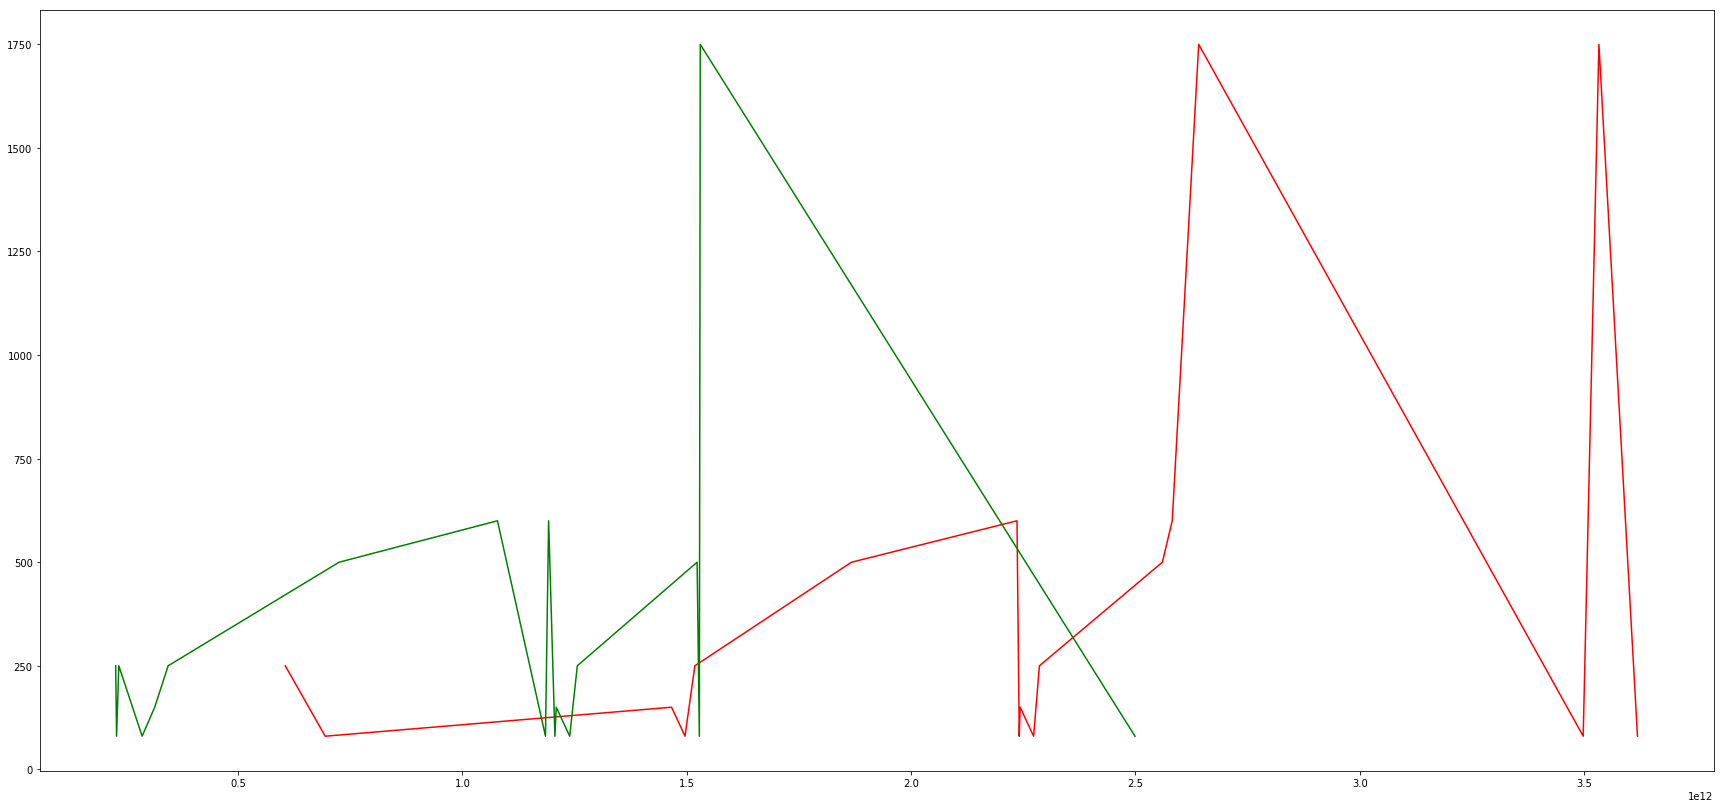

In [117]:
x_good = test_good_fcoke_val['increment_event_time']
y_good = test_good_fcoke_val['floatvalue']
x_bad = test_bad_fcoke_val['increment_event_time']
y_bad = test_bad_fcoke_val['floatvalue']

plt.plot(x_bad,y_bad,color='red')
plt.plot(x_good,y_good, color='green')

plt.show()

In [118]:
test_good_fcoke_val

,index,event_time,floatvalue,bucket_no,start_time,increment_event_time
0,5310025,2019-09-16 15:36:52,250.0,1.0,2019-09-16 15:33:05,00:03:47
1,5310026,2019-09-16 15:36:52,250.0,1.0,2019-09-16 15:33:05,00:03:47
2,5310027,2019-09-16 15:36:52,250.0,1.0,2019-09-16 15:33:05,00:03:47
3,5310028,2019-09-16 15:36:52,250.0,1.0,2019-09-16 15:33:05,00:03:47
4,5310029,2019-09-16 15:36:54,80.0,1.0,2019-09-16 15:33:05,00:03:49
5,5310030,2019-09-16 15:36:54,80.0,1.0,2019-09-16 15:33:05,00:03:49
6,5310031,2019-09-16 15:36:54,80.0,1.0,2019-09-16 15:33:05,00:03:49
7,5310032,2019-09-16 15:36:54,80.0,1.0,2019-09-16 15:33:05,00:03:49
8,5310033,2019-09-16 15:36:59,250.0,1.0,2019-09-16 15:33:05,00:03:54
9,5310034,2019-09-16 15:36:59,250.0,1.0,2019-09-16 15:33:05,00:03:54


In [541]:
test_good_fcoke[test_good_fcoke['bucket_no']==1.0].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,1.600000e+01,1.600000e+01,16.0,16.0,0.0,1.600000e+01,16.000000,1.600000e+01,16.0,1.600000e+01,1.600000e+01,1.600000e+01,16.0
mean,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,165.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0
std,6.879800e-16,0.000000e+00,0.0,0.0,NaN,0.000000e+00,87.787623,1.467691e-14,0.0,0.000000e+00,0.000000e+00,2.518224e+04,0.0
min,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,80.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0
25%,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,80.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0
50%,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,165.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0
75%,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,250.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0
max,1.983900e+00,1.568648e+12,1.0,192.0,NaN,1.568651e+12,250.000000,4.558550e+01,0.0,1.568648e+12,1.568648e+12,1.568648e+12,18.0


In [542]:
test_bad_fcoke[test_bad_fcoke['bucket_no']==1.0].describe()

,bucket_duration_mins,bucket_load_time_unix,bucket_no,dataintegrity,datevalue,end_time_unix,floatvalue,heat_duration_mins,intvalue,next_bucket_load_time_unix,start_time_unix,t_stamp,tagid
count,8.0000,8.000000e+00,8.0,8.0,0.0,8.000000e+00,8.000000,8.0000,8.0,8.000000e+00,8.000000e+00,8.000000e+00,8.0
mean,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,165.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0
std,0.0000,0.000000e+00,0.0,0.0,NaN,0.000000e+00,90.868822,0.0000,0.0,0.000000e+00,0.000000e+00,4.757304e+04,0.0
min,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,80.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0
25%,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,80.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0
50%,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,165.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0
75%,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,250.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0
max,14.6173,1.568916e+12,1.0,192.0,NaN,1.568919e+12,250.000000,63.1198,0.0,1.568916e+12,1.568915e+12,1.568916e+12,18.0


In [60]:
gd_1_500 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 250) & (test_good_fcoke_val['floatvalue'] < 500) & (test_good_fcoke_val['bucket_no']==1.0)]
gd_2_500 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 250) & (test_good_fcoke_val['floatvalue'] < 500) & (test_good_fcoke_val['bucket_no']==2.0)]
gd_3_500 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 250) & (test_good_fcoke_val['floatvalue'] < 500) & (test_good_fcoke_val['bucket_no']==3.0)]

bd_1_500 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 250) & (test_bad_fcoke_val['floatvalue'] < 500) & (test_bad_fcoke_val['bucket_no']==1.0)]
bd_2_500 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 250) & (test_bad_fcoke_val['floatvalue'] < 500) & (test_bad_fcoke_val['bucket_no']==2.0)]
bd_3_500 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 250) & (test_bad_fcoke_val['floatvalue'] < 500) & (test_bad_fcoke_val['bucket_no']==3.0)]


print("good 1 -- 250 & 500 : ", gd_1_500['increment_event_time'].mean())
print("good 2 -- 250 & 500 : ", gd_2_500['increment_event_time'].mean())
print("good 3 -- 250 & 500 : ", gd_2_500['increment_event_time'].mean())
print('\n')

print("bad 1 -- 250 & 500 : ", bd_1_500['increment_event_time'].mean())
print("bad 2 -- 250 & 500 : ", bd_2_500['increment_event_time'].mean())
print("bad 3 -- 250 & 500 : ", bd_3_500['increment_event_time'].mean())

good 1 -- 250 & 500 :  0 days 00:03:50.500000
good 2 -- 250 & 500 :  0 days 00:05:44
good 3 -- 250 & 500 :  0 days 00:05:44


bad 1 -- 250 & 500 :  0 days 00:10:05
bad 2 -- 250 & 500 :  NaT
bad 3 -- 250 & 500 :  0 days 00:31:42


In [62]:
gd_1_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==1.0)]
gd_2_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==2.0)]
gd_3_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==3.0)]

bd_1_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==1.0)]
bd_2_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==2.0)]
bd_3_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==3.0)]


print("good 1 -- 500 & 1000 : ", gd_1_1000['increment_event_time'].mean())
print("good 2 -- 500 & 1000 : ", gd_2_1000['increment_event_time'].mean())
print("good 3 -- 500 & 1000 : ", gd_3_1000['increment_event_time'].mean())
print('\n')

print("bad 1 -- 500 & 1000 : ", bd_1_1000['increment_event_time'].mean())
print("bad 2 -- 500 & 1000 : ", bd_2_1000['increment_event_time'].mean())
print("bad 3 -- 500 & 1000 : ", bd_3_1000['increment_event_time'].mean())

good 1 -- 500 & 1000 :  NaT
good 2 -- 500 & 1000 :  0 days 00:16:38.333333
good 3 -- 500 & 1000 :  0 days 00:25:23


bad 1 -- 500 & 1000 :  NaT
bad 2 -- 500 & 1000 :  NaT
bad 3 -- 500 & 1000 :  0 days 00:38:31.250000


In [527]:
gd_1_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==1.0)]
gd_2_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==2.0)]
gd_3_1000 = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 500) & (test_good_fcoke_val['floatvalue'] < 1000) & (test_good_fcoke_val['bucket_no']==3.0)]

bd_1_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==1.0)]
bd_2_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==2.0)]
bd_3_1000 = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 500) & (test_bad_fcoke_val['floatvalue'] < 1000) & (test_bad_fcoke_val['bucket_no']==3.0)]


print("good 1 -- 500 & 1000 : ", gd_1_1000['increment_event_time'].mean())
print("good 2 -- 500 & 1000 : ", gd_2_1000['increment_event_time'].mean())
print("good 3 -- 500 & 1000 : ", gd_3_1000['increment_event_time'].mean())
print('\n')

print("bad 1 -- 500 & 1000 : ", bd_1_1000['increment_event_time'].mean())
print("bad 2 -- 500 & 1000 : ", bd_2_1000['increment_event_time'].mean())
print("bad 3 -- 500 & 1000 : ", bd_3_1000['increment_event_time'].mean())

good 1 -- 500 & 1000 :  NaT
good 2 -- 500 & 1000 :  0 days 00:16:38.333333
good 3 -- 500 & 1000 :  0 days 00:25:23


bad 1 -- 500 & 1000 :  NaT
bad 2 -- 500 & 1000 :  NaT
bad 3 -- 500 & 1000 :  0 days 00:38:31.250000


In [528]:
gd_1_max = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 1000) & (test_good_fcoke_val['bucket_no']==1.0)]
gd_2_max = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 1000) & (test_good_fcoke_val['bucket_no']==2.0)]
gd_3_max = test_good_fcoke_val[(test_good_fcoke_val['floatvalue'] >= 1000) & (test_good_fcoke_val['bucket_no']==3.0)]

bd_1_max = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 1000)  & (test_bad_fcoke_val['bucket_no']==1.0)]
bd_2_max = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 1000)  & (test_bad_fcoke_val['bucket_no']==2.0)]
bd_3_max = test_bad_fcoke_val[(test_bad_fcoke_val['floatvalue'] >= 1000)  & (test_bad_fcoke_val['bucket_no']==3.0)]


print("good 1 -- max : ", gd_1_max['increment_event_time'].mean())
print("good 2 -- max : ", gd_2_max['increment_event_time'].mean())
print("good 3 -- max : ", gd_3_max['increment_event_time'].mean())
print('\n')

print("bad 1 -- max : ", bd_1_max['increment_event_time'].mean())
print("bad 2 -- max : ", bd_2_max['increment_event_time'].mean())
print("bad 3 -- max : ", bd_3_max['increment_event_time'].mean())

good 1 -- max :  NaT
good 2 -- max :  NaT
good 3 -- max :  0 days 00:25:30


bad 1 -- max :  NaT
bad 2 -- max :  NaT
bad 3 -- max :  0 days 00:51:27


### K Mean Clustering

In [36]:

## so the optimal number of cluster for heart dataset is 2
from sklearn.cluster import KMeans

X_heat = samp_popln_aug[['Total VLB system main oxygen consumption','AF_Total_KWH']]
kmeans_heat = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=10)
y_kmeans_heat = kmeans_heat.fit_predict(X_heat)

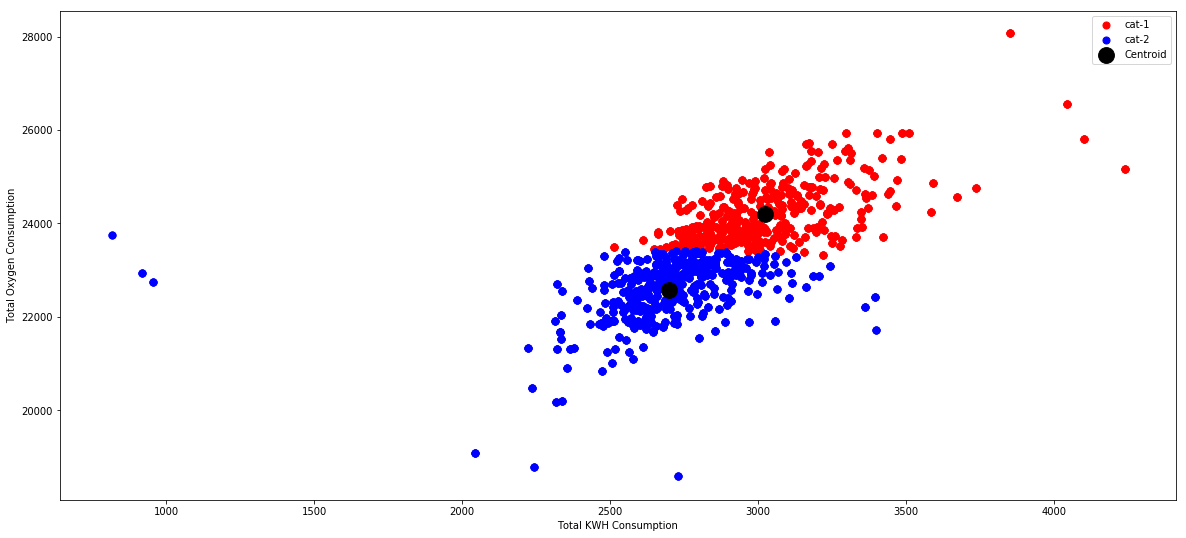

In [47]:
### Total VLB system main oxygen consumption
plt.figure(figsize=(20,9))

plt.scatter(X_heat.iloc[y_kmeans_heat == 0,0], X_heat.iloc[y_kmeans_heat==0,1], s=50, color='red', label='cat-1')
plt.scatter(X_heat.iloc[y_kmeans_heat == 1,0], X_heat.iloc[y_kmeans_heat==1,1], s=50, color='blue', label='cat-2')
# plt.scatter(X_heat.iloc[y_kmeans_heat == 2,8], X_heat.iloc[y_kmeans_heat==2,1], s=50, color='green', label='cat-3')
# plt.scatter(X_heat.iloc[y_kmeans_heat == 3,0], X_heat.iloc[y_kmeans_heat==3,1], s=50, color='orange', label='cat-4')

plt.scatter(kmeans_heat.cluster_centers_[:,0], kmeans_heat.cluster_centers_[:, 1],\
            s= 250, color = 'black', label ='Centroid')

# plt.title('Total VLB system main oxygen consumption')
plt.xlabel('Total KWH Consumption')
plt.ylabel('Total Oxygen Consumption')
plt.legend()
plt.show()

In [48]:
kmeans_heat.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [49]:
def heat_cat(mean):
    if mean<0:
        return "Good Heat"
    else:
        return "Bad Heat"

In [50]:
samp_popln_aug['Category'] = samp_popln_aug['Mean_Diff_60MA'].apply(heat_cat)

In [51]:
# print("Good Performing Heats: ", len(samp_popln_aug[samp_popln_aug['Category']=="Good Heat"]))
# print("Bad Performing Heats: ", len(samp_popln_aug[samp_popln_aug['Category']=="Bad Heat"]))

In [52]:
def converter(cluster):
    if cluster=='Good Heat':
        return 0
    else:
        return 1

In [53]:
samp_popln_aug['Cluster'] = samp_popln_aug['Category'].apply(converter)

In [54]:
# sample_popln

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(samp_popln_aug['Cluster'],kmeans_heat.labels_))
print(classification_report(samp_popln_aug['Cluster'],kmeans_heat.labels_))

[[663 949]
 [721 560]]
              precision    recall  f1-score   support

           0       0.48      0.41      0.44      1612
           1       0.37      0.44      0.40      1281

   micro avg       0.42      0.42      0.42      2893
   macro avg       0.43      0.42      0.42      2893
weighted avg       0.43      0.42      0.42      2893



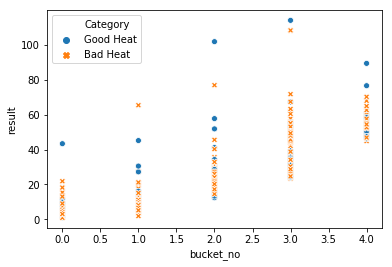

In [225]:
sns.scatterplot(x='bucket_no',y='result',hue='Category', style='Category', data=df_tableau)

In [186]:
df_tableau = df_tableau[df_tableau['result']<120.0]

In [187]:
df_tableau.describe()

,bucket_no,bucket_duration_mins,AF_Total_KWH,result
count,788.000000,788.000000,788.000000,788.000000
mean,1.769036,11.748046,23487.360406,22.701577
std,1.318409,9.509100,895.792728,19.795628
min,0.000000,0.200300,21320.000000,0.837200
25%,1.000000,3.021300,22860.000000,5.059600
50%,2.000000,10.022700,23440.000000,17.992000
75%,3.000000,18.580425,23952.500000,35.646075
max,4.000000,63.826200,25930.000000,113.880200


In [185]:
df_tableau[df_tableau['result']>100]

,heat_no,bucket_no,bucket_duration_mins,AF_Total_KWH,Heat_No,Category,result
509,L19NH03822,2.0,9.2825,24000.0,L19NH03822,Good Heat,101.6861
510,L19NH03822,3.0,12.1941,24000.0,L19NH03822,Good Heat,113.8802
511,L19NH03822,4.0,23.0778,24000.0,L19NH03822,Good Heat,136.9580
555,L19NH03833,2.0,16.2893,23150.0,L19NH03833,Good Heat,181.0633
556,L19NH03833,3.0,27.7929,23150.0,L19NH03833,Good Heat,208.8562
688,L19NH03862,3.0,31.3406,24730.0,L19NH03862,Bad Heat,108.1223


In [120]:
sample_popln.columns

Index(['Unnamed: 0', 'heat_no', 'heat_duration_mins',
       'Total VLB system main oxygen consumption',
       'Total VLB system oil consumption',
       'Total VLB system secondary oxygen consumption',
       'Total carbjet fine coke consumption',
       'Total coke consumption charged from ACS conveyor', 'Total_Charge_Wt',
       'Billet_Wt', 'RBT_Life', 'Session', 'Heat_No', 'Total_Furnace_Wt',
       'AF_Total_KWH', 'AF_Total_KWH_MA', 'Oxygen_Ratio', 'Oil_Ratio',
       'Power_Ratio', 'AF_Total_KWH_Ratio_MA', 'AF_Total_KWH_AbsPerc_MA',
       'AF_Total_KWH_Ratio', 'AF_Total_KWH_AbsPerc',
       'AF_Total_KWH_AbsPerc_MA_10', 'AF_Total_KWH_AbsPerc_MA_21',
       'AF_Total_KWH_AbsPerc_40MA', 'Mean_value', 'mean_difference',
       'Category', 'Cluster'],
      dtype='object')

In [139]:
df_oxyMode1 = df[df['tag_name'] == 'Actual VLB operating mode - VLB 1']
df_oxyMode2 = df[df['tag_name'] == 'Actual VLB operating mode - VLB 2']
df_oxyMode3 = df[df['tag_name'] == 'Actual VLB operating mode - VLB 3']

In [141]:
df_oxyMode1['event_time_datetime'] = pd.to_datetime(df_oxyMode1['event_time'])
df_oxyMode2['event_time_datetime'] = pd.to_datetime(df_oxyMode2['event_time'])
df_oxyMode3['event_time_datetime'] = pd.to_datetime(df_oxyMode3['event_time'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [142]:
df_oxyMode2['event_time_diff'] = df_oxyMode2['event_time_datetime'].diff()
df_oxyMode2['event_time_diff'] = df_oxyMode2['event_time_datetime'].diff()
df_oxyMode3['event_time_diff'] = df_oxyMode3['event_time_datetime'].diff()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [143]:
df_oxyMode1['event_time_diff_shift'] = df_oxyMode1['event_time_diff'].shift(-1)
df_oxyMode2['event_time_diff_shift'] = df_oxyMode2['event_time_diff'].shift(-1)
df_oxyMode2['event_time_diff_shift'] = df_oxyMode2['event_time_diff'].shift(-1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [145]:
df_oxyMode1 = df_oxyMode1.groupby(by=['heat_no','intvalue','bucket_no'])['event_time_diff_shift'].sum().reset_index()
df_oxyMode2 = df_oxyMode2.groupby(by=['heat_no','intvalue','bucket_no'])['event_time_diff_shift'].sum().reset_index()
df_oxyMode3 = df_oxyMode3.groupby(by=['heat_no','intvalue','bucket_no'])['event_time_diff_shift'].sum().reset_index()

In [59]:
df_goodHeat = pd.read_csv('df_goodHeat.csv')
df_badHeat = pd.read_csv('df_badHeat.csv')

In [60]:
times=pd.to_timedelta(['00:00:00'])

In [146]:
for time in times:
    i = df_oxyMode1[df_oxyMode1['event_time_diff_shift']<time].index
    df_oxyMode1.drop(i, inplace=True)

for time in times:
    i = df_oxyMode2[df_oxyMode2['event_time_diff_shift']<time].index
    df_oxyMode2.drop(i, inplace=True)
    
for time in times:
    i = df_oxyMode3[df_oxyMode3['event_time_diff_shift']<time].index
    df_oxyMode3.drop(i, inplace=True)

In [147]:
df_goodHeat_OMT1 = pd.merge(df_oxyMode1,df_goodHeat[['heat_no']],how='inner',on='heat_no')
df_badHeat_OMT1 = pd.merge(df_oxyMode1,df_badHeat[['heat_no']],how='inner',on='heat_no')

df_goodHeat_OMT2 = pd.merge(df_oxyMode2,df_goodHeat[['heat_no']],how='inner',on='heat_no')
df_badHeat_OMT2 = pd.merge(df_oxyMode2,df_badHeat[['heat_no']],how='inner',on='heat_no')

df_goodHeat_OMT3 = pd.merge(df_oxyMode3,df_goodHeat[['heat_no']],how='inner',on='heat_no')
df_badHeat_OMT3 = pd.merge(df_oxyMode3,df_badHeat[['heat_no']],how='inner',on='heat_no')


In [148]:
df_badHeat_OMT1.drop_duplicates(inplace=True)
df_goodHeat_OMT1.drop_duplicates(inplace=True)

df_badHeat_OMT2.drop_duplicates(inplace=True)
df_goodHeat_OMT2.drop_duplicates(inplace=True)

df_badHeat_OMT3.drop_duplicates(inplace=True)
df_goodHeat_OMT3.drop_duplicates(inplace=True)


In [151]:
print("VLB 1: Mode 1- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==1.0]['event_time_diff_shift'].mean())
print("VLB 1: Mode 1- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==1.0]['event_time_diff_shift'].mean())

print("VLB 1: Difference b/w BAD and GOOD heats for mode 1: ", pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==1.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==1.0]['event_time_diff_shift'].mean()))

print('\n')

print("VLB 2: Mode 1- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT2[df_goodHeat_OMT2['intvalue']==1.0]['event_time_diff_shift'].mean())
print("VLB 2: Mode 1- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT2[df_badHeat_OMT2['intvalue']==1.0]['event_time_diff_shift'].mean())

print("VLB 2: Difference b/w BAD and GOOD heats for mode 1: ", \
      pd.to_timedelta(df_badHeat_OMT2[df_badHeat_OMT2['intvalue']==1.0]['event_time_diff_shift'].mean())\
      -  pd.to_timedelta(df_goodHeat_OMT2[df_goodHeat_OMT2['intvalue']==1.0]['event_time_diff_shift'].mean()))







VLB 1: Mode 1- Good Heat -- Mean Run time:  0 days 00:01:23.346405
VLB 1: Mode 1- Bad Heat -- Mean Run time:  0 days 00:01:48.031914
VLB 1: Difference b/w BAD and GOOD heats for mode 1:  0 days 00:00:24.685509


VLB 2: Mode 1- Good Heat -- Mean Run time:  0 days 00:03:38.996478
VLB 2: Mode 1- Bad Heat -- Mean Run time:  0 days 00:07:18.819905
VLB 2: Difference b/w BAD and GOOD heats for mode 1:  0 days 00:03:39.823426


In [115]:
print("Mode 2- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==2.0]['event_time_diff_shift'].mean())
print("Mode 2- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==2.0]['event_time_diff_shift'].mean())
print("Difference b/w GOOD and BAD heats for mode 2: ", pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==2.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==2.0]['event_time_diff_shift'].mean()))




Mode 2- Good Heat -- Mean Run time:  0 days 00:01:21.555555
Mode 2- Bad Heat -- Mean Run time:  0 days 00:00:37.300000
Difference b/w GOOD and BAD heats for mode 2:  0 days 00:00:44.255555


In [112]:
print("Mode 3- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==3.0]['event_time_diff_shift'].mean())
print("Mode 3- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==3.0]['event_time_diff_shift'].mean())

print("Difference b/w BAD and GOOD heats for mode 3: ", pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==3.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==3.0]['event_time_diff_shift'].mean()))


Mode 3- Good Heat -- Mean Run time:  NaT
Mode 3- Bad Heat -- Mean Run time:  NaT
Difference b/w bad and good heats for mode 3:  NaT


In [117]:
print("Mode 4- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==4.0]['event_time_diff_shift'].mean())
print("Mode 4- Bad Heat -- Mean Run time: ", \
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==4.0]['event_time_diff_shift'].mean())

print("Difference b/w GOOD and BAD heats for mode 2: ", pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==4.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==4.0]['event_time_diff_shift'].mean()))



Mode 4- Good Heat -- Mean Run time:  0 days 00:05:37
Mode 4- Bad Heat -- Mean Run time:  0 days 00:00:21
Difference b/w GOOD and BAD heats for mode 2:  0 days 00:05:16


In [128]:
print("Mode 5- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==5.0]['event_time_diff_shift'].mean())
print("Mode 5- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==5.0]['event_time_diff_shift'].mean())

print("Conclusion: No Significant difference for mode 5")


Mode 5- Good Heat -- Mean Run time:  0 days 00:04:02.579793
Mode 5- Bad Heat -- Mean Run time:  0 days 00:03:59.097447
Conclusion: No Significant difference for mode 5


In [125]:
print("Mode 6- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT[df_goodHeat_OMT1['intvalue']==6.0]['event_time_diff_shift'].mean())
print("Mode 6- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT[df_badHeat_OMT1['intvalue']==6.0]['event_time_diff_shift'].mean())


print("Conclusion: No Significant difference for mode 8")

Mode 6- Good Heat -- Mean Run time:  0 days 00:02:21.300000
Mode 6- Bad Heat -- Mean Run time:  0 days 00:02:27.840000
Conclusion: No Significant difference for mode 8


In [138]:
print("Mode 7- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT[df_goodHeat_OMT1['intvalue']==7.0]['event_time_diff_shift'].mean())
print("Mode 7- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT[df_badHeat_OMT1['intvalue']==7.0]['event_time_diff_shift'].mean())

print("Conclusion: No Significant difference for mode 8")

NameError: name 'df_goodHeat_OMT1' is not defined

In [121]:
print("Mode 8- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==8.0]['event_time_diff_shift'].mean())
print("Mode 8- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==8.0]['event_time_diff_shift'].mean())

print("Conclusion: No Significant difference for mode 8")


Mode 8- Good Heat -- Mean Run time:  0 days 00:01:40.784615
Mode 8- Bad Heat -- Mean Run time:  0 days 00:01:56.108033
No Significant difference for mode 8


In [122]:
print("Mode 9- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==9.0]['event_time_diff_shift'].mean())
print("Mode 9- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==9.0]['event_time_diff_shift'].mean())


print("Difference b/w BAD and GOOD heats for mode 3: ", pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==9.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==9.0]['event_time_diff_shift'].mean()))


Mode 9- Good Heat -- Mean Run time:  0 days 00:09:41.666666
Mode 9- Bad Heat -- Mean Run time:  0 days 00:12:05.653061
Difference b/w BAD and GOOD heats for mode 3:  0 days 00:02:23.986394


In [123]:
print("Mode 10- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==10.0]['event_time_diff_shift'].mean())
print("Mode 10- Bad Heat -- Mean Run time: ",\
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==10.0]['event_time_diff_shift'].mean())


print("Difference b/w GOOD and BAD heats for mode 10: ", pd.to_timedelta(df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==10.0]['event_time_diff_shift'].mean()) -  pd.to_timedelta(df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==10.0]['event_time_diff_shift'].mean()))


Mode 10- Good Heat -- Mean Run time:  0 days 00:17:23.966555
Mode 10- Bad Heat -- Mean Run time:  0 days 00:15:14.881533
Difference b/w GOOD and BAD heats for mode 10:  0 days 00:02:09.085022


In [124]:
print("Mode 11- Good Heat -- Mean Run time: ",\
      df_goodHeat_OMT1[df_goodHeat_OMT1['intvalue']==11.0]['event_time_diff_shift'].mean())
print("Mode 11- Bad Heat -- Mean Run time: ", \
      df_badHeat_OMT1[df_badHeat_OMT1['intvalue']==11.0]['event_time_diff_shift'].mean())

print("Conclusion: No Significant difference for mode 8")



Mode 11- Good Heat -- Mean Run time:  0 days 00:00:57.334415
Mode 11- Bad Heat -- Mean Run time:  0 days 00:00:56.990099
No Significant difference for mode 8


In [ ]:
## Mode 1, 4, 9, 10, 

